<div align='center'>
    <h1>Bangla Handwritten Digit Classification</h1>
</div>
<br />
<div align='center'>
    <a href='https://sabbir-ahmed16.github.io/portfolio/'>Portfolio</a> | <a href='https://www.linkedin.com/in/sabbir-ahmed-cuet-ete/'>LinkedIn</a> | <a href='https://www.facebook.com/SabbirAhmed823'>Facebook</a>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_male = pd.read_csv(r'maleDigits.csv')
df_female = pd.read_csv(r'femaleDigits.csv')

In [3]:
print("Number of samples in male dataset: ", df_male.shape[0])
print("Number of samples in female dataset: ", df_female.shape[0])

Number of samples in male dataset:  15208
Number of samples in female dataset:  15622


<div class='alert alert-block alert-info' align='center'>
<b>Each of the dataset contains approximately 15000 samples. Concatenating both the dataset will help to use more samples to train ML and DL models and hence the accuracy should be increased.</b>
</div>

In [4]:
df = pd.concat([df_male, df_female], ignore_index=True)

In [5]:
display(df.head())

# Printing the total number of samples
print("Total number of samples: ", df.shape[0])

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,...,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,...,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,...,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,...,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,112


Total number of samples:  30830


<div class='alert alert-block alert-info' align='center'>
    <b>Labels given in the dataset are not the actual levels. The <code>metaData.csv</code> file provides the actual level for each digit.</b>
</div>

In [6]:
# Replacing the values in label column with actual label
df['label'].replace({112: 0, 113: 1, 114: 2, 115: 3, 116: 4, 117: 5, 118: 6, 119: 7, 120: 8, 121: 9}, inplace=True)

In [7]:
# Printing the number of samples for each digit
df['label'].value_counts()

3    3090
4    3087
8    3087
7    3086
1    3084
0    3083
6    3083
5    3081
2    3075
9    3074
Name: label, dtype: int64

In [8]:
# Checking whether any null is present in the column or not
df.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
label       0
Length: 785, dtype: int64

In [9]:
# Separating the features and labels
features = df.iloc[:, 0:784]
labels = df.iloc[:, -1:]

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [11]:
# Splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=12)

print("Training size: ", X_train.shape)
print("Test size: ", X_test.shape)

Training size:  (24664, 784)
Test size:  (6166, 784)


In [12]:
# Creating a list of the class names
class_names = np.unique(labels).tolist()

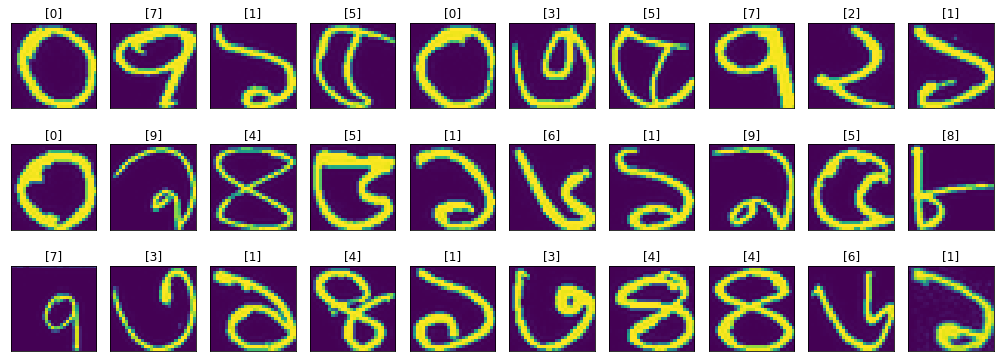

In [13]:
# Plotting some digits
plt.figure(figsize=(14, 12))

for img in range(0, 30):
    plt.subplot(7, 10, img+1)
    grid_data = X_train.iloc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"{y_train.iloc[img].values}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [14]:
# Normalizing the pixel values
scaler = StandardScaler()

Xn_train = scaler.fit_transform(X_train)
Xn_test = scaler.transform(X_test)

### Training ML Algorithms

In [15]:
# 01. LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [16]:
LR = LogisticRegression(solver='liblinear')

LR.fit(Xn_train, np.squeeze(y_train))
LR_predictions = LR.predict(Xn_test)

In [17]:
# 02. SUPPORT VECTOR MACHINE

from sklearn.svm import SVC

In [18]:
SVM = SVC(kernel='rbf')

SVM.fit(Xn_train, np.squeeze(y_train))
SVM_predictions = SVM.predict(Xn_test)

In [19]:
# 03. DECISION TREE

from sklearn.tree import DecisionTreeClassifier

In [20]:
DT = DecisionTreeClassifier()

DT.fit(Xn_train, np.squeeze(y_train))
DT_predictions = DT.predict(Xn_test)

In [21]:
# 04. RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

In [22]:
RF = RandomForestClassifier(n_estimators=9)

RF.fit(Xn_train, np.squeeze(y_train))
RF_predictions = RF.predict(Xn_test)

### Model Evaluation

In [23]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [24]:
def model_evaluation(model_name, y_true, y_pred):
    print('=================================================================')
    print(f'\t\tPERFORMANCE OF {model_name}')
    print('=================================================================')
    print(f'Classification Report: \n{classification_report(y_true, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_true, y_pred)}')
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    return accuracy

In [25]:
LR_acc = model_evaluation('LOGISTIC REGRESSION', y_test, LR_predictions)

		PERFORMANCE OF LOGISTIC REGRESSION
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       606
           1       0.84      0.82      0.83       602
           2       0.87      0.86      0.87       637
           3       0.82      0.79      0.81       633
           4       0.89      0.85      0.87       644
           5       0.83      0.81      0.82       614
           6       0.71      0.79      0.75       592
           7       0.87      0.87      0.87       609
           8       0.83      0.91      0.87       602
           9       0.77      0.74      0.75       627

    accuracy                           0.83      6166
   macro avg       0.83      0.83      0.83      6166
weighted avg       0.83      0.83      0.83      6166

Confusion Matrix: 
[[527  10   5  13   8  13   7   8   8   7]
 [ 13 491  15   1   7   8  13   5  14  35]
 [  6  11 550   1   8   5  15  14  10  17]
 [ 19   6   7 502   5  16  48   

In [26]:
SVM_acc = model_evaluation('SUPPORT VECTOR MACHINE', y_test, SVM_predictions)

		PERFORMANCE OF SUPPORT VECTOR MACHINE
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       606
           1       0.93      0.88      0.91       602
           2       0.92      0.94      0.93       637
           3       0.94      0.91      0.92       633
           4       0.94      0.93      0.93       644
           5       0.93      0.92      0.92       614
           6       0.90      0.91      0.90       592
           7       0.86      0.96      0.90       609
           8       0.94      0.94      0.94       602
           9       0.89      0.88      0.89       627

    accuracy                           0.92      6166
   macro avg       0.92      0.92      0.92      6166
weighted avg       0.92      0.92      0.92      6166

Confusion Matrix: 
[[561   3   0  11   2   9   2  11   5   2]
 [  7 531  12   0   4   5   5  10   6  22]
 [  1   4 598   0   8   3   4   8   1  10]
 [ 11   2   1 574   0   6  18

In [27]:
DT_acc = model_evaluation('DECISION TREE CLASSIFIER', y_test, DT_predictions)

		PERFORMANCE OF DECISION TREE CLASSIFIER
Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       606
           1       0.76      0.78      0.77       602
           2       0.84      0.83      0.83       637
           3       0.78      0.80      0.79       633
           4       0.81      0.77      0.79       644
           5       0.76      0.79      0.77       614
           6       0.79      0.77      0.78       592
           7       0.87      0.84      0.85       609
           8       0.83      0.85      0.84       602
           9       0.68      0.66      0.67       627

    accuracy                           0.79      6166
   macro avg       0.79      0.79      0.79      6166
weighted avg       0.79      0.79      0.79      6166

Confusion Matrix: 
[[507  16   7  22  10  22   3   2   8   9]
 [ 10 472  10  15   7  12   8   5  13  50]
 [  3   9 530   5  19  10  16  13  10  22]
 [ 29  10   3 508   6  16  

In [28]:
RF_acc = model_evaluation('RANDOM FOREST CLASSIFIER', y_test, RF_predictions)

		PERFORMANCE OF RANDOM FOREST CLASSIFIER
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       606
           1       0.84      0.87      0.85       602
           2       0.88      0.94      0.91       637
           3       0.85      0.86      0.85       633
           4       0.89      0.88      0.88       644
           5       0.85      0.87      0.86       614
           6       0.85      0.83      0.84       592
           7       0.92      0.90      0.91       609
           8       0.90      0.91      0.91       602
           9       0.84      0.74      0.79       627

    accuracy                           0.87      6166
   macro avg       0.87      0.87      0.87      6166
weighted avg       0.87      0.87      0.87      6166

Confusion Matrix: 
[[552   8   3  10   4  14   2   4   4   5]
 [  6 523  10   6   5   8   5   1   9  29]
 [  3   5 597   3   6   3   4   3   5   8]
 [ 13  11   5 546   3  12  

### Plotting the Predictions Given by SVM

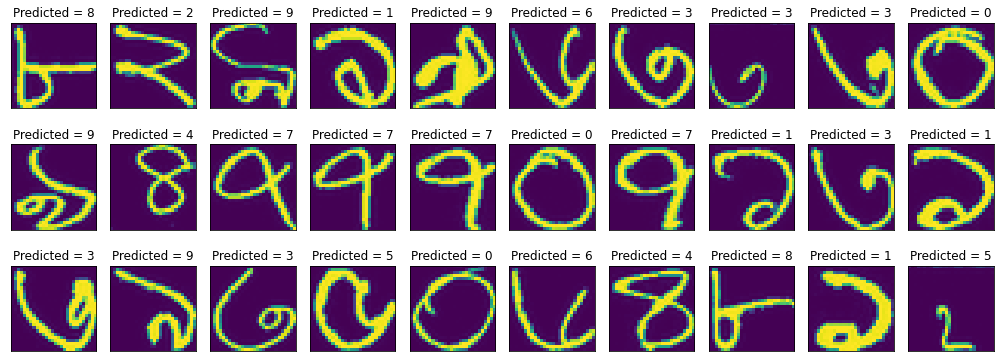

In [29]:
# Plotting some digits
plt.figure(figsize=(14, 12))

for img in range(0, 30):
    plt.subplot(7, 10, img+1)
    grid_data = X_test.iloc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted = {SVM_predictions[img]}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [30]:
# Plotting the misclassified samples given by SVM
y_test['predicted'] = SVM_predictions

In [31]:
# Taking the indices and converting into a list
indices = y_test.index.tolist()

misclass_indices = list()

for i in indices:
    if y_test['label'][i] != y_test['predicted'][i]:
        misclass_indices.append(i)

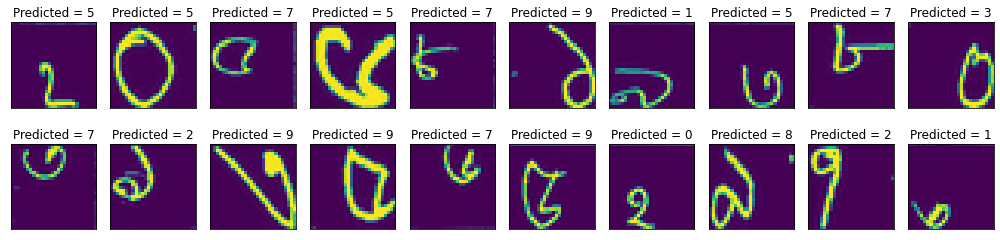

In [32]:
# Plotting some misclassified digits
plt.figure(figsize=(14,12))

for i,img in enumerate(misclass_indices[0:20]):
    plt.subplot(7, 10, i+1)
    grid_data = X_test.loc[img].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data)
    plt.title(f"Predicted = {y_test['predicted'].loc[img]}")
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

### Training Fully Connected Artificial Neural Network

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

In [34]:
inputs = keras.Input(shape=(784,))
x = layers.Dense(128, activation="relu")(inputs)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)

ann_model = keras.Model(inputs=inputs, outputs=outputs, name="ANN_model")

In [35]:
ann_model.summary()

Model: "ANN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


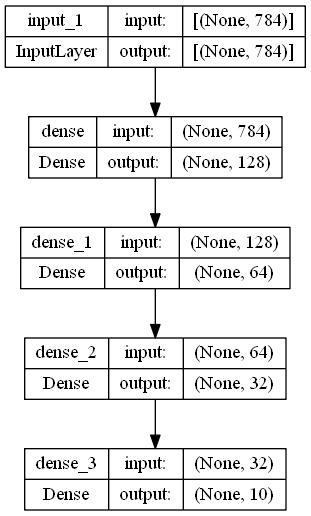

In [36]:
keras.utils.plot_model(ann_model, "ann_model_info.png", show_shapes=True)

In [37]:
keras.backend.clear_session()

ann_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"],
)

ann_history = ann_model.fit(Xn_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
309/309 - 1s - loss: 0.6460 - accuracy: 0.7886 - val_loss: 0.4226 - val_accuracy: 0.8611 - 1s/epoch - 4ms/step
Epoch 2/10
309/309 - 1s - loss: 0.3420 - accuracy: 0.8876 - val_loss: 0.3598 - val_accuracy: 0.8800 - 697ms/epoch - 2ms/step
Epoch 3/10
309/309 - 1s - loss: 0.2555 - accuracy: 0.9168 - val_loss: 0.3572 - val_accuracy: 0.8855 - 705ms/epoch - 2ms/step
Epoch 4/10
309/309 - 1s - loss: 0.1934 - accuracy: 0.9379 - val_loss: 0.3224 - val_accuracy: 0.8990 - 693ms/epoch - 2ms/step
Epoch 5/10
309/309 - 1s - loss: 0.1538 - accuracy: 0.9512 - val_loss: 0.3373 - val_accuracy: 0.8995 - 706ms/epoch - 2ms/step
Epoch 6/10
309/309 - 1s - loss: 0.1148 - accuracy: 0.9646 - val_loss: 0.3269 - val_accuracy: 0.9082 - 702ms/epoch - 2ms/step
Epoch 7/10
309/309 - 1s - loss: 0.0960 - accuracy: 0.9706 - val_loss: 0.3646 - val_accuracy: 0.9072 - 707ms/epoch - 2ms/step
Epoch 8/10
309/309 - 1s - loss: 0.0750 - accuracy: 0.9773 - val_loss: 0.3707 - val_accuracy: 0.9061 - 765ms/epoch - 2ms/step
Epo

In [38]:
# Accuracy Plot
ann_history_df = pd.DataFrame(ann_history.history)

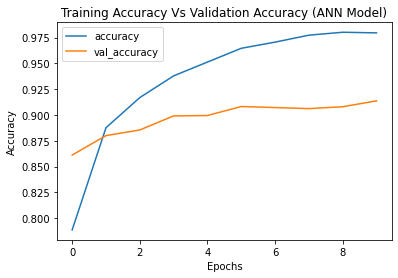

In [39]:
ann_history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy (ANN Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

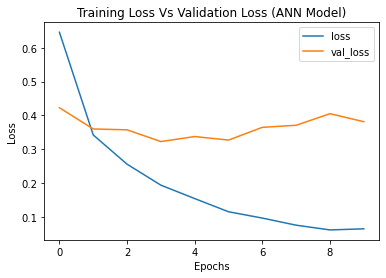

In [40]:
# Loss plot
ann_history_df[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss (ANN Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
# Evaluating the ANN model
ANN_results = ann_model.evaluate(Xn_test, y_test['label'], batch_size=64, verbose=2)

ANN_loss = ANN_results[0]
ANN_acc = ANN_results[1]

# Getting probability scores
ann_predictions = ann_model.predict(Xn_test)

97/97 - 0s - loss: 0.4060 - accuracy: 0.9168 - 153ms/epoch - 2ms/step
193/193 [==============================] - 0s 1ms/step


### Training Convolutional Neural Network

In [42]:
# Reshaping the image
Xn_train = Xn_train.reshape(Xn_train.shape[0], 28, 28, 1)
Xn_test = Xn_test.reshape(Xn_test.shape[0], 28, 28, 1)

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
# One-Hot encoding the labels
y_train = to_categorical(y_train)

y_test = y_test['label']
y_test = to_categorical(y_test)

In [45]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=8, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(10, activation="softmax")(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs, name="CNN_model")

In [46]:
cnn_model.summary()

Model: "CNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          46

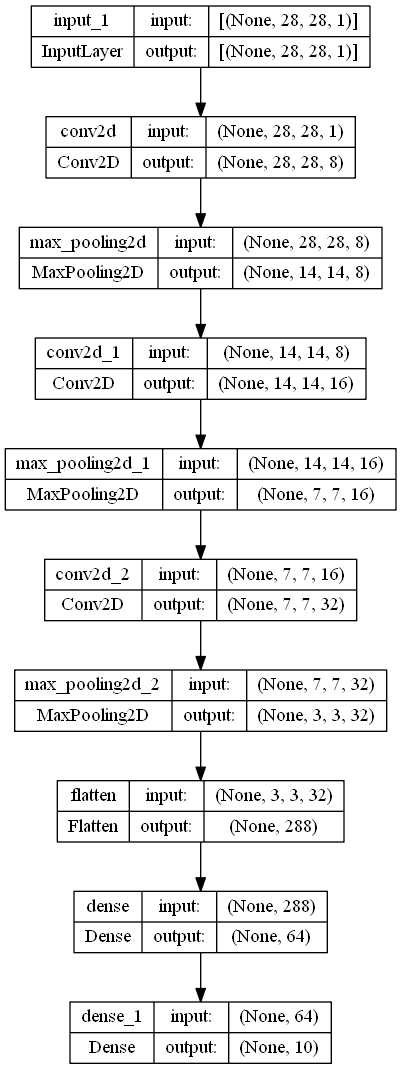

In [47]:
keras.utils.plot_model(cnn_model, "cnn_model_info.png", show_shapes=True)

In [48]:
keras.backend.clear_session()

cnn_model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"],
)

cnn_history = cnn_model.fit(Xn_train, y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=2)

Epoch 1/10
309/309 - 5s - loss: 0.6797 - accuracy: 0.7778 - val_loss: 0.3052 - val_accuracy: 0.8995 - 5s/epoch - 16ms/step
Epoch 2/10
309/309 - 5s - loss: 0.2495 - accuracy: 0.9185 - val_loss: 0.1935 - val_accuracy: 0.9410 - 5s/epoch - 15ms/step
Epoch 3/10
309/309 - 4s - loss: 0.1685 - accuracy: 0.9451 - val_loss: 0.1595 - val_accuracy: 0.9483 - 4s/epoch - 14ms/step
Epoch 4/10
309/309 - 4s - loss: 0.1183 - accuracy: 0.9623 - val_loss: 0.1432 - val_accuracy: 0.9550 - 4s/epoch - 14ms/step
Epoch 5/10
309/309 - 4s - loss: 0.0952 - accuracy: 0.9695 - val_loss: 0.1230 - val_accuracy: 0.9639 - 4s/epoch - 14ms/step
Epoch 6/10
309/309 - 4s - loss: 0.0712 - accuracy: 0.9767 - val_loss: 0.1192 - val_accuracy: 0.9631 - 4s/epoch - 14ms/step
Epoch 7/10
309/309 - 4s - loss: 0.0634 - accuracy: 0.9787 - val_loss: 0.1088 - val_accuracy: 0.9672 - 4s/epoch - 14ms/step
Epoch 8/10
309/309 - 4s - loss: 0.0523 - accuracy: 0.9825 - val_loss: 0.1147 - val_accuracy: 0.9653 - 4s/epoch - 14ms/step
Epoch 9/10
309/3

In [49]:
cnn_history_df = pd.DataFrame(cnn_history.history)

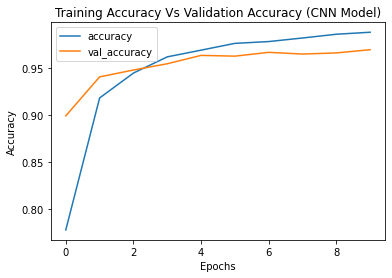

In [50]:
# Accuracy plot
cnn_history_df[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy (CNN Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

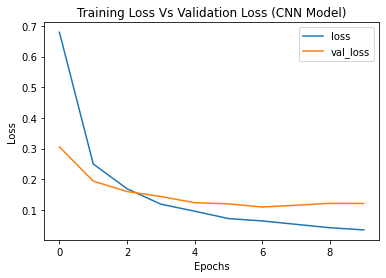

In [51]:
# Loss plot
cnn_history_df[['loss', 'val_loss']].plot()
plt.title('Training Loss Vs Validation Loss (CNN Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [52]:
# Evaluating the ANN model
CNN_results = cnn_model.evaluate(Xn_test, y_test, batch_size=64, verbose=2)

CNN_loss = CNN_results[0]
CNN_acc = CNN_results[1]

# Getting probability scores
cnn_predictions = cnn_model.predict(Xn_test)

97/97 - 1s - loss: 0.1143 - accuracy: 0.9726 - 504ms/epoch - 5ms/step
193/193 [==============================] - 1s 5ms/step


### Plotting Heatmap of Confusion Matrices for ANN & CNN

In [53]:
def heatmap_plot(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='YlGn', fmt='g')

    ax.set_title('Confusion Matrix for ' + model_name, fontdict={'fontsize': 16, 'fontweight': 'bold'});
    ax.set_xlabel('Predicted Classes', fontdict={'fontsize': 16})
    ax.set_ylabel('Actual Classes', fontdict={'fontsize': 16});

    ## Ticket labels - List must be in alphabetical order
    ax.set_xticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])
    ax.set_yticklabels(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

    # Display the visualization of the Confusion Matrix
    fig.tight_layout()
    plt.show()

In [54]:
# Converting one-hot encoded matrix to 1D numpy array of actual label
ann_predictions = np.argmax(ann_predictions, axis=1)
cnn_predictions = np.argmax(cnn_predictions, axis=1)

y_test = np.argmax(y_test, axis=1)

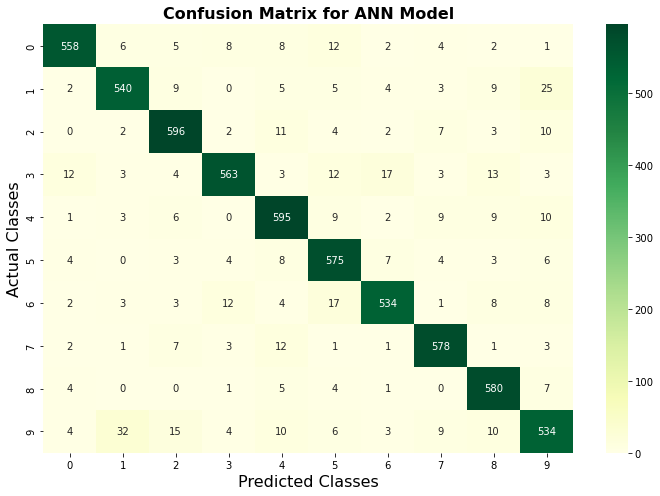

In [55]:
# Heatmap of ANN model
heatmap_plot('ANN Model', y_test, ann_predictions)

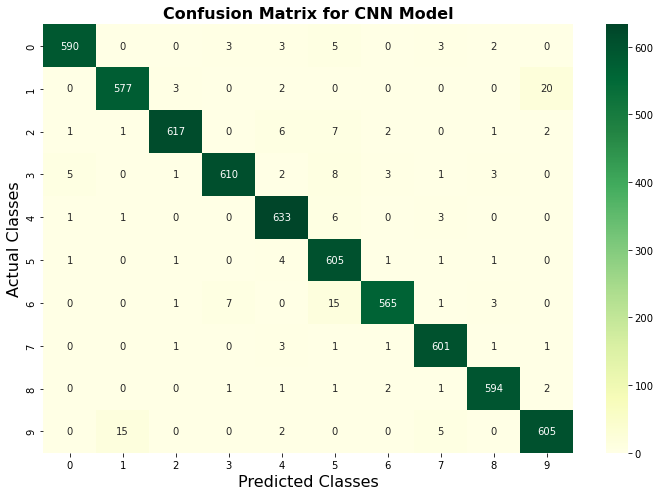

In [56]:
# Heatmap of CNN model
heatmap_plot('CNN Model', y_test, cnn_predictions)

### Performance Comparison Among  Different Models

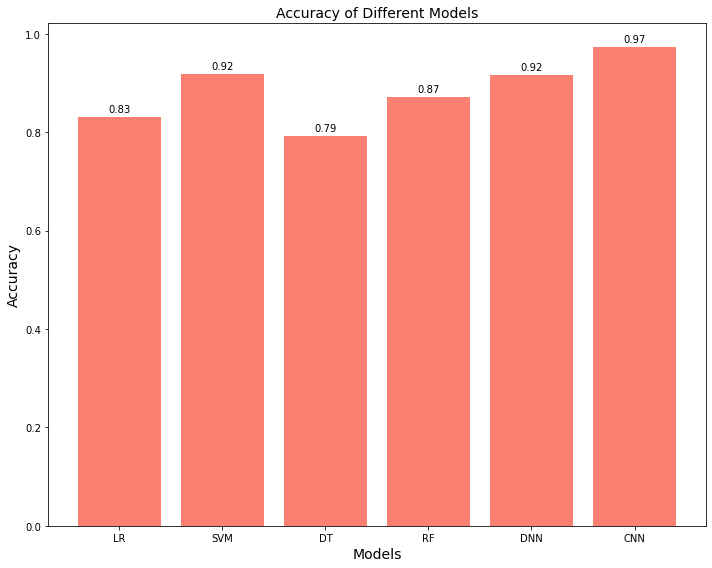

In [57]:
# Accuracy Bar Chart
models = ['LR', 'SVM', 'DT', 'RF', 'DNN', 'CNN']
accuracies = [LR_acc, SVM_acc, DT_acc, RF_acc, ANN_acc, CNN_acc]

fig = plt.figure(figsize=(10, 8))
plt.bar(models, accuracies, color='#FA8072')

for i in range(len(models)):
    plt.text(i, accuracies[i]+0.01, '{:.2f}'.format(accuracies[i]), ha = 'center')

plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy of Different Models", fontsize=14)
fig.tight_layout()
plt.show()

### Observations
- Highest accuracy was obtained using convolutional neural network.
- Both the DNN and CNN was found to be overfitted on training data.
- Among the ML algorithms, SVM provided highest scores.

### Future Works
- The overfitting problem could be reduced in both the NNs by reducing the number of neurons, using regularization parameter or by introducing dropout layer.
- The same procedures could be utilized to classify other alphabets of Bangla language using the dataset.